In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.stats as stats
from scipy.stats import kurtosis
from pyeeg import hjorth_mobility_complexity
import pandas as pd
from scipy.stats import skew

In [12]:


wav_file = "./Collection - 10.07.21 - Cleaned_Data/mimosa_nosound-17.30.12.wav"
samplerate, data = wavfile.read(wav_file)
nyq = 0.5 *samplerate
low_cut = 0
high_cut = 20
low = low_cut/nyq
high = high_cut/nyq
b, a = signal.butter(20, 0.1, 'low')
length = int(len(data/ samplerate))
start = 0 
finish = samplerate
new_data = np.array([])
while start < len(data):
    data_new = data[start:finish]
    snippet_mean = np.mean(data_new)
    new_data = np.append(new_data, [snippet_mean])
    start = start + samplerate
    finish = finish + samplerate
transformed_data = new_data[0:len(new_data) - 1]
filteredData = signal.filtfilt(b, a, transformed_data) #data is the signal to be filtered
split_array = np.array_split(filteredData, 15)

wav_file2 = "./Collection - 10.07.21 - Cleaned_Data/chili_construction-19.23.07.wav"
samplerate2, data2 = wavfile.read(wav_file2)
nyq = 0.5 *samplerate2
low_cut = 0
high_cut = 20
low = low_cut/nyq
high = high_cut/nyq
b, a = signal.butter(20, 0.1, 'low')
length2 = int(len(data2/ samplerate2))
start2 = 0 
finish2 = samplerate2
new_data2 = np.array([])
while start2 < len(data2):
    data_new2 = data2[start2:finish2]
    snippet_mean2 = np.mean(data_new2)
    new_data2 = np.append(new_data2, [snippet_mean2])
    start2 = start2 + samplerate2
    finish2 = finish2 + samplerate2
transformed_data2 = new_data2[0:len(new_data2) - 1]
filteredData2 = signal.filtfilt(b, a, transformed_data2) #data is the signal to be filtered
split_array2 = np.array_split(filteredData2, 15)

In [56]:
csv_file_decibel = "./Collection - 10.07.21 - Cleaned_Data/chili_construction-19.23.07_decibel.csv"
decibel_df = pd.read_csv(csv_file_decibel)
conv_arr= decibel_df.values
decibel = np.delete(conv_arr,[0],axis=1) 
decibel = decibel.ravel()
decibel_split_array = np.array_split(decibel, 15)

csv_file_decibel2 = "./Collection - 10.07.21 - Cleaned_Data/chili_construction-19.23.07_decibel.csv"
decibel_df2 = pd.read_csv(csv_file_decibel2)
conv_arr2= decibel_df2.values
decibel2 = np.delete(conv_arr2,[0],axis=1) 
decibel2 = decibel2.ravel()
decibel_split_array2 = np.array_split(decibel2, 15)

In [45]:

mean_array = np.array([])
i = 0
while i < len(split_array):
    mean_value = np.mean(split_array[i])
    mean_array = np.append(mean_array, mean_value)
    print(mean_value)
    i = i + 1

print(mean_array)

plt.hist(mean_array, bins='auto')
plt.show()
 
    
    
i = 0
while i < len(split_array):
    max = signal.argrelmax(split_array[i])
    peaks, _= signal.find_peaks(split_array[i], height=0)
    plt.plot(split_array[i])
    number = str(i)
    title = "Chili No Sound Minute - "
    plt.title(title + number )
    plt.xlabel('Time') 
    plt.ylabel('Amplitude') 
    plt.plot(peaks, split_array[i][peaks], "x")
    plt.savefig(title + number + '.png')
    plt.clf()
    i = i + 1
    print(peaks)


TypeError: 'int' object is not callable

In [8]:
 i = 0
while i < len(split_array):
    kurtosis_value = kurtosis(split_array[i])
    print(kurtosis_value)
    i = i + 1

-1.0893043259348136
-0.9973535002721254
-0.7216133514395202
-1.4834635227328066
-1.2701954226752143
0.7242135806420236
-0.0243214689017468
-0.11121799326504966
0.8356691348412864
0.7597848369580813
-0.2522646692598549
-1.0926214838891233
-1.2022076589368038
-0.6441266947526332
-0.8998637179680351


In [9]:
'''i = 0
while i < len(split_array):
    max = signal.argrelmax(decibel_split_array[i])
    peaks, _= signal.find_peaks(decibel_split_array[i], height=0)
    plt.plot(decibel_split_array[i])
    number = str(i)
    title = "Decibel Title minute"
    plt.title(title + number )
    plt.plot(peaks, decibel_split_array[i][peaks], "x")
    plt.savefig(title + number + '.png')
    plt.clf()
    i = i + 1
    print(peaks) ''' 

'i = 0\nwhile i < len(split_array):\n    max = signal.argrelmax(decibel_split_array[i])\n    peaks, _= signal.find_peaks(decibel_split_array[i], height=0)\n    plt.plot(decibel_split_array[i])\n    number = str(i)\n    title = "Decibel Title minute"\n    plt.title(title + number )\n    plt.plot(peaks, decibel_split_array[i][peaks], "x")\n    plt.savefig(title + number + \'.png\')\n    plt.clf()\n    i = i + 1\n    print(peaks) '

In [10]:
 i = 0
while i < len(split_array):
    std_value = np.std(split_array[i])
    print(std_value)
    i = i + 1


35.27017148288305
52.56789486522862
116.82691626388186
101.02203700159085
64.83941587883248
31.741263777249742
33.48453799372189
40.762034550287765
22.9144393625962
15.767300403506843
32.05168067508433
44.52177712491589
40.31589749947932
21.64809640194036
30.857902607230457


In [11]:
 i = 0
while i < len(split_array):
    skew_value = skew(split_array[i])
    print(skew_value)
    i = i + 1

0.6366248782237249
0.006809642455781379
0.41398436215061224
0.0003991780846042023
-0.0981229901927066
1.1345451733151908
0.865940762279361
1.0193404637190602
1.0829230246557837
1.2258566497899872
-0.1142330558495771
-0.6474836514656811
0.3704699790828949
-0.6408699586647963
0.45135067895280895


In [120]:
'''while len(split_array[3]) != len(split_array2[3]): 
    split_array[1] = np.append(split_array[3],0)
'''
print(len(split_array[0]))
print(len(split_array2[0]))
ttest = stats.ttest_ind(split_array[0],
                split_array2[0])

pearson = stats.pearsonr(split_array[0],
                split_array2[0])


i = 0
while i < len(split_array):
    hjorth_value = hjorth_mobility_complexity.hjorth(split_array[i])
    print(hjorth_value)
    i = i + 1
#hjorth_mobility_complexity.hjorth(split_array[4])

61
61
(0.023342753890835104, 36.35665289200419)
(0.0264421696143133, 26.154844614746903)
(0.04596451961303654, 18.812181805651356)
(0.03887798642966847, 23.27795524453967)
(0.013489531849387549, 20.833759912306668)
(0.014207712851418253, 18.528110299954474)
(0.022517517025993194, 16.716865800255416)
(0.035061964056045114, 27.801889060347023)
(0.019410795706082225, 53.36481211216464)
(0.0266977860527332, 37.987155425492745)
(0.014965285106581202, 58.51578714929216)
(0.018655802256575788, 50.1609386685638)
(0.015746583030870752, 58.39718589593805)
(0.018557333168721615, 50.2000991105644)
(0.026348058857327286, 36.36972262486482)


In [112]:
print(ttest)

Ttest_indResult(statistic=-3.3093858333254302, pvalue=0.001240358269369085)


In [109]:
print(pearson)

(0.6536904870571367, 1.4907195812255288e-08)


In [114]:
i = 0
while i < len(split_array):

    cut = split_array[i][0:len(decibel_split_array[i])]

    ttest = stats.ttest_ind(cut,
                decibel_split_array[i])
    print(ttest)
    print("\n")
    pearson = stats.pearsonr(cut,
                decibel_split_array[i])
    print(pearson)
    i = i + 1

Ttest_indResult(statistic=-28.71831593524007, pvalue=1.49319460898324e-54)


(0.11809940207079567, 0.3730082269088869)
Ttest_indResult(statistic=-19.410387790104725, pvalue=6.204213946744823e-38)


(0.06904746400504344, 0.6065403865321428)
Ttest_indResult(statistic=-21.676509063848073, pvalue=3.036069142351038e-42)


(-0.1567308087330933, 0.24002650399785677)
Ttest_indResult(statistic=-115.64140088793971, pvalue=5.162613677295386e-120)


(0.19761054181607002, 0.1370406999857057)
Ttest_indResult(statistic=-35.96171549061885, pvalue=4.753937110557004e-64)


(-0.08822609421068552, 0.51017236179235)
Ttest_indResult(statistic=-31.247987597546068, pvalue=9.918067462061226e-58)


(-0.1574428115310586, 0.2378707726992456)
Ttest_indResult(statistic=-66.47359687401436, pvalue=5.11664579025216e-93)


(-0.05778081966531179, 0.6665944370285345)
Ttest_indResult(statistic=-43.82394155895926, pvalue=3.5144884486531673e-73)


(-0.2912893748326099, 0.02652399394423527)
Ttest_indResult(statistic=-71.3244

Text(0, 0.5, 'Amplitude')

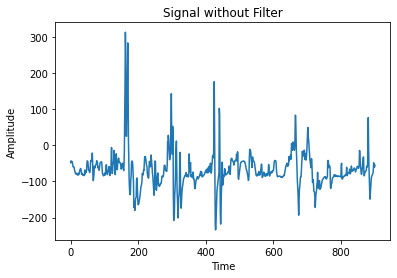

In [15]:
plt.plot(transformed_data)
title = "Signal without Filter"
plt.title(title)
plt.xlabel('Time') 
plt.ylabel('Amplitude') 